#flipkart product review and rating sentiment analysis

In [5]:
import pandas as pd #data maipulation
import numpy as np #numerical computing
import matplotlib.pyplot as plt #visualization
import seaborn as sns ##

In [6]:
df=pd.read_csv('./Dataset-SA.csv') #read the data

In [7]:
df.shape  #shape of the data

(205052, 6)

In [8]:
df.sample(5) #sample view of data

,product_name,product_price,Rate,Review,Summary,Sentiment
119206,Mivi Fort S16 Soundbar with 2 full range drive...,1499,5,fabulous!,super sound yar,positive
9074,Whirlpool CLASSIC CF 60 BK HOOD 60 cm 750 m??/...,5298,4,wonderful,same as in image a bit on higher side the pric...,positive
160217,Realistic Store Solid Happy Birthday Decoratio...,214,5,simply awesome,nice products,positive
1681,"Crompton 75 L Desert Air Cooler??????(White, T...",9999,5,terrific purchase,excellent product,positive
93874,"Mi 22.5W Quick Charger combo for Mi,Redmi,Xiom...",649,4,good choice,very good charger,positive


In [9]:
df.info() #data-type , null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [10]:
df.isnull().sum() #total null values in each colums


product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

#data cleaning

In [11]:
df = df.dropna(subset=['Review'])


#EDA

<Axes: xlabel='Sentiment', ylabel='Rate'>

c:\Users\Aliza Momin\Desktop\sentiment_analysis_on-product_review\.env\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
c:\Users\Aliza Momin\Desktop\sentiment_analysis_on-product_review\.env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 131 (\x83) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


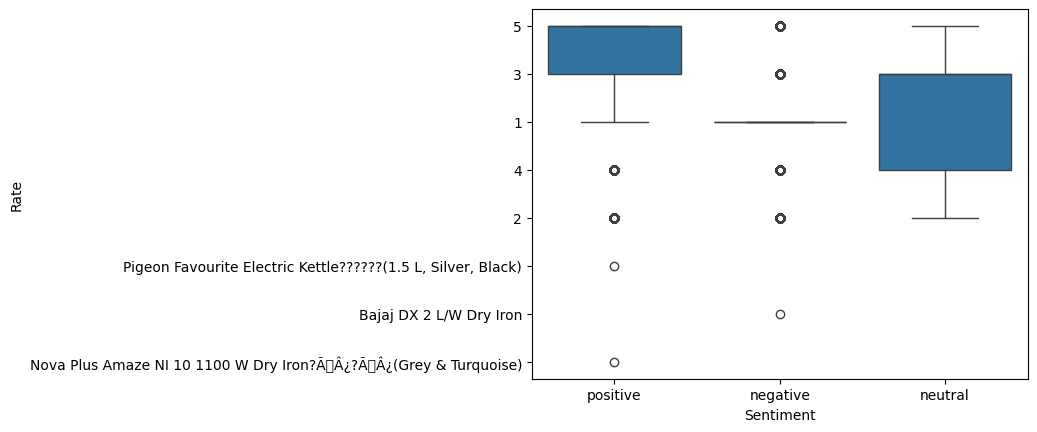

In [12]:
sns.boxplot(x='Sentiment', y='Rate', data=df)
#whishkers

In [13]:
df['Rate'].unique() #different values in rate to find exact outliers

array(['5', '3', '1', '4', '2',
       'Pigeon Favourite Electric Kettle??????(1.5 L, Silver, Black)',
       'Bajaj DX 2 L/W Dry Iron',
       'Nova Plus Amaze NI 10 1100 W Dry Iron?Ã\x83Â¿?Ã\x83Â¿(Grey & Turquoise)'],
      dtype=object)

In [14]:
df = df[df['Rate'].str.strip().str.isdigit()] #removing outliers in rate

In [15]:
df['Rate'].value_counts() #

Rate
5    105647
4     36969
1     18294
3     14024
2      5451
Name: count, dtype: int64

<Axes: xlabel='Rate', ylabel='count'>

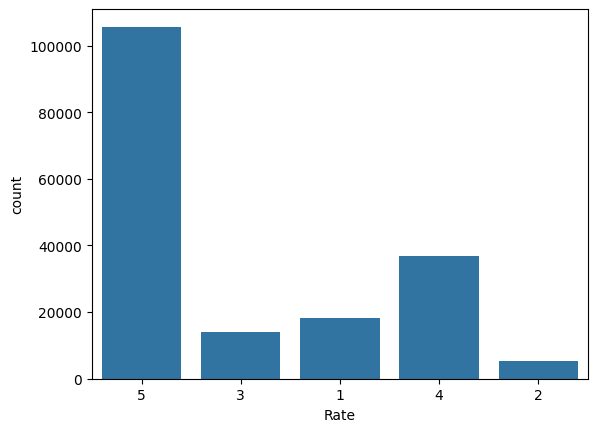

In [16]:
sns.countplot(x='Rate',data=df) #rate analysis

<Axes: xlabel='Sentiment', ylabel='count'>

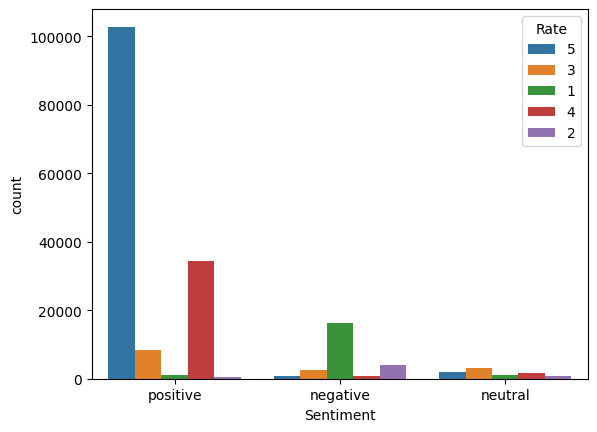

In [17]:
sns.countplot(x='Sentiment',hue='Rate', data=df) #sentiment vs rate

<Axes: ylabel='count'>

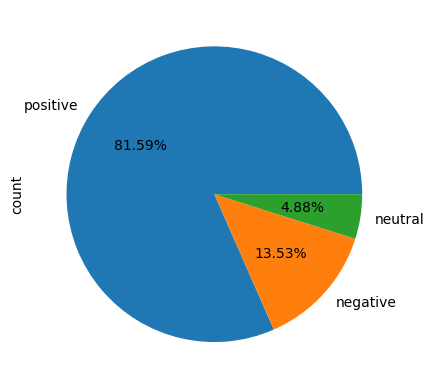

In [18]:
df['Sentiment'].value_counts().plot(kind='pie',autopct='%.2f%%') #rate percentage

<Axes: ylabel='count'>

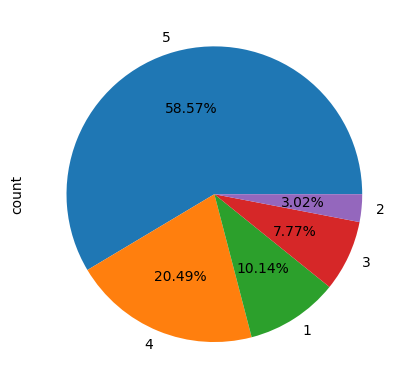

In [19]:
df['Rate'].value_counts().plot(kind='pie',autopct='%.2f%%')

<Axes: xlabel='Rate'>

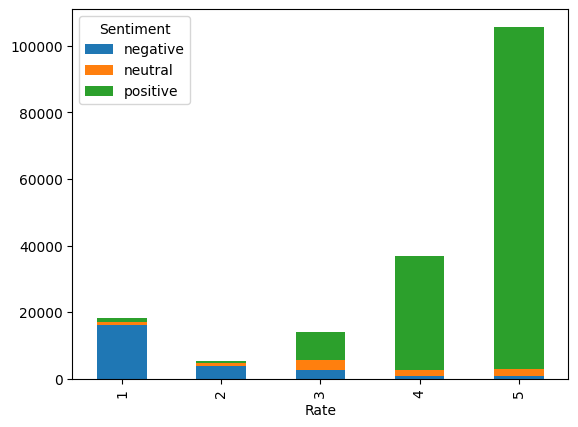

In [20]:
pd.crosstab(df['Rate'], df['Sentiment']).plot(kind='bar', stacked=True)


text and review analysis

In [21]:
#A) Review Length
df.loc[:, 'review_length'] = df['Review'].fillna('').apply(lambda x: len(str(x).split()))


In [22]:
df.sample(3)

,product_name,product_price,Rate,Review,Summary,Sentiment,review_length
124174,PHILIPS MMS8085B/94 Convertible 80 W Bluetooth...,6999,3,decent product,woofer was not properly work sound is split,neutral,2
93624,"Apple 20W ,USB-C Power Charging Adapter for iP...",1899,5,highly recommended,good one,positive,2
28346,Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...,218,5,brilliant,its a very good and useful product,positive,1


In [23]:
df['review_length'].unique() #different values in length of review

array([ 1,  2,  3,  4, 10,  5,  7, 12,  8,  6,  9, 11, 21, 13, 22, 14, 15])

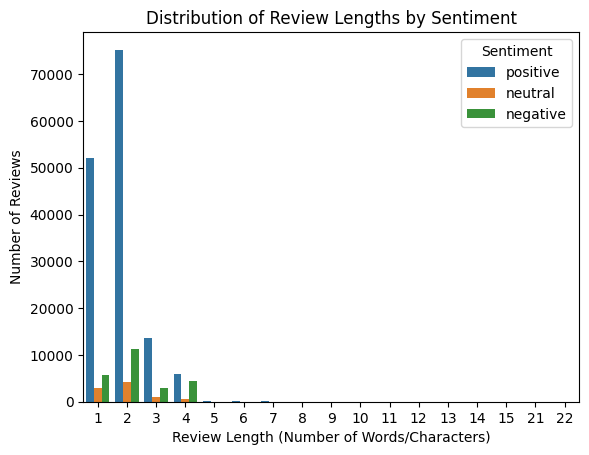

In [24]:
#sns.countplot(x= 'Sentiment',hue='review_length',data=df)
sns.countplot(x= 'review_length',hue='Sentiment',data=df)
plt.title("Distribution of Review Lengths by Sentiment")
plt.xlabel("Review Length (Number of Words/Characters)")
plt.ylabel("Number of Reviews")
plt.show()


In [25]:
df['review_length'].value_counts()

review_length
2     90698
1     60664
3     17484
4     10938
5       184
6       128
7       102
8        58
9        50
10       36
11       20
12       15
13        4
21        1
22        1
14        1
15        1
Name: count, dtype: int64

In [26]:
from collections import Counter #import counter class from collection
import nltk #Natural Language Toolkit
nltk.download('stopwords') #doenload stop words
from nltk.corpus import stopwords #

[nltk_data] Downloading package stopwords to C:\Users\Aliza
[nltk_data]     Momin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [27]:
#len(stopwords.words('english'))

In [28]:
stop = set(stopwords.words('english'))#set of stop words
len(stop)

198

In [29]:
#' '.join(df['Review'].dropna())

In [30]:
words = ' '.join(df['Review'].dropna()).lower().split() #list of words present in reviews
filtered = [w for w in words if w not in stop and w.isalpha()] # seperate out only meaningfull words without stop words
counter_=Counter(filtered)# Counter(filtered) counts how many times each word appears.
counter_.most_common(20)


[('product', 24179),
 ('good', 17430),
 ('awesome', 11289),
 ('purchase', 11021),
 ('terrific', 10952),
 ('nice', 9393),
 ('worth', 9037),
 ('wonderful', 9029),
 ('specified', 8351),
 ('recommended', 6690),
 ('great', 5702),
 ('best', 5654),
 ('brilliant', 5648),
 ('perfect', 5615),
 ('every', 5609),
 ('classy', 5604),
 ('penny', 5604),
 ('simply', 5600),
 ('must', 5592),
 ('excellent', 5584)]

In [31]:
'''
using the Multinomial Naive Bayes model, which is a variant of the Naive Bayes classifier designed for discrete features like word counts or term frequencies in text classification.
Used For:
Text classification problems (e.g., spam detection, sentiment analysis)

Works well with TF, TF-IDF, or CountVectorizer outputs
'''

'\nusing the Multinomial Naive Bayes model, which is a variant of the Naive Bayes classifier designed for discrete features like word counts or term frequencies in text classification.\nUsed For:\nText classification problems (e.g., spam detection, sentiment analysis)\n\nWorks well with TF, TF-IDF, or CountVectorizer outputs\n'

In [32]:
#df['Sentiment'].isnull().sum()


In [33]:
#df.loc['Sentiment']=df.dropna(subset=['Sentiment'])
#df = df.dropna(subset=['Sentiment'])  # Drop rows where review is NaN


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
#TF: term frequency, #numer of times words appear
#IDF: checkes how rare words is
from sklearn.model_selection import train_test_split #split data into training and testing
from sklearn.naive_bayes import MultinomialNB #model
from sklearn.metrics import classification_report #eval
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [35]:
#Vetorize text
tfidf = TfidfVectorizer(stop_words='english', max_features=5000) #by default none
X = tfidf.fit_transform(df['Review'].astype(str)) #to convert ana to str
y = df['Sentiment']
X #(no of reviews, no of unique words)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 295714 stored elements and shape (180385, 1139)>

In [36]:

#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#stratify:prevents biased evaluation

In [37]:
#Train model
model = MultinomialNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [38]:
# 4. Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.71      0.78      4880
     neutral       0.05      0.00      0.00      1762
    positive       0.91      0.99      0.95     29435

    accuracy                           0.90     36077
   macro avg       0.60      0.57      0.58     36077
weighted avg       0.86      0.90      0.88     36077



Accuracy: 0.90


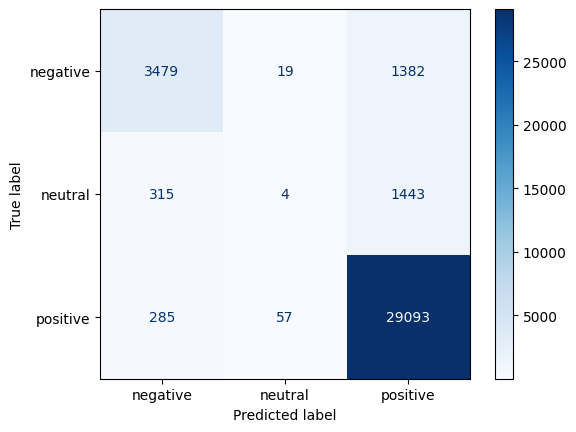

In [39]:


# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")


# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')


In [40]:
import pickle

pickle.dump(tfidf, open("tfidf_vectorizer.pkl", "wb"))
pickle.dump(model, open("sentiment_model.pkl", "wb"))


In [ ]:
import pickle
import numpy as np

# Load saved TF-IDF and model
tfidf = pickle.load(open("tfidf_vectorizer.pkl", "rb"))
model = pickle.load(open("sentiment_model.pkl", "rb"))

# Function for prediction
def predict_sentiment(review):
    # Convert to list for vectorizer
    review_vector = tfidf.transform([review])  
    
    # Predict
    pred = model.predict(review_vector)[0]
    

    return pred

# Example input (real-world)
new_review = "product quality is good"

sentiment = predict_sentiment(new_review)

print("Review :", new_review)
print("Predicted Sentiment :", sentiment)



Review : on time
Predicted Sentiment : positive
